# **SpaceX  Falcon 9 First Stage Landing Prediction**


***


### Import Libraries and Define Auxiliary Functions


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis


In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0


plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. As the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


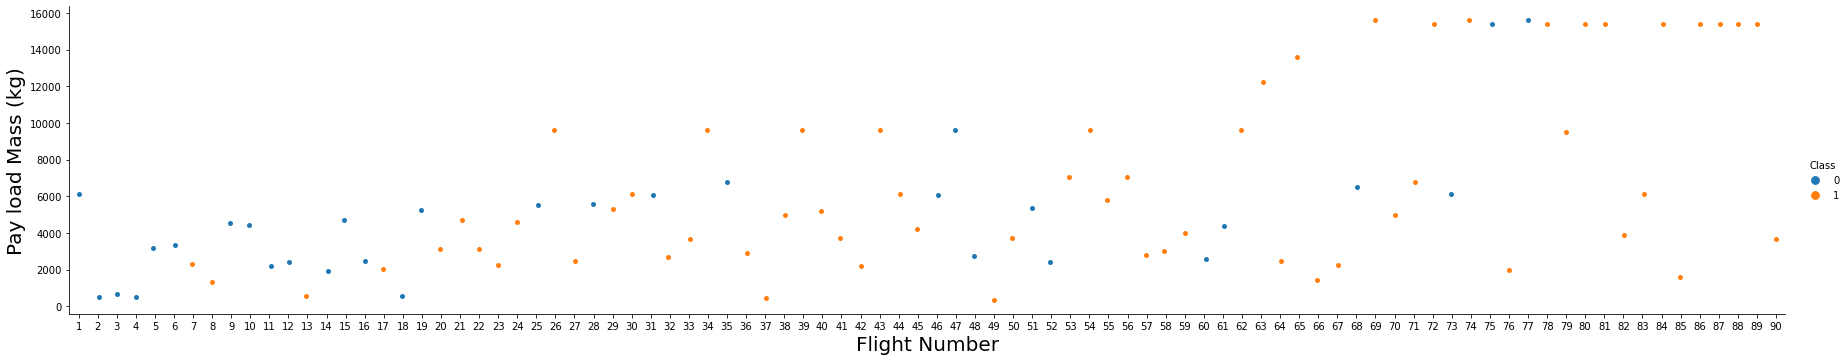

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

different launch sites have different success rates.  <code>CCAFS LC-40</code>, has a success rate of 60 %, while  <code>KSC LC-39A</code> and <code>VAFB SLC 4E</code> has a success rate of 77%.


the relationship between Flight Number and Launch Site


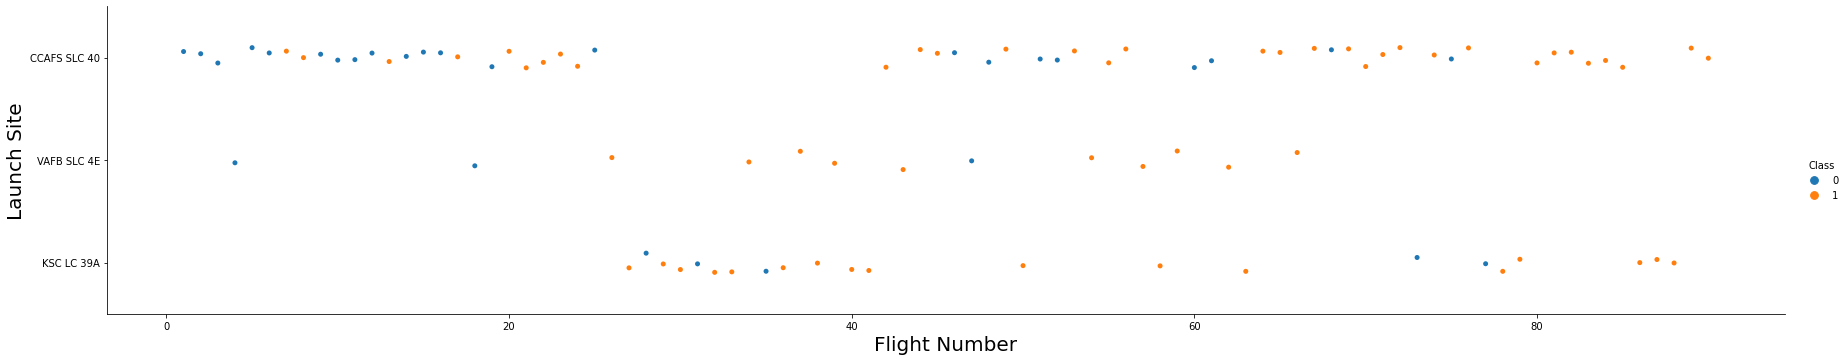

In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

the relationship between Payload and Launch Site


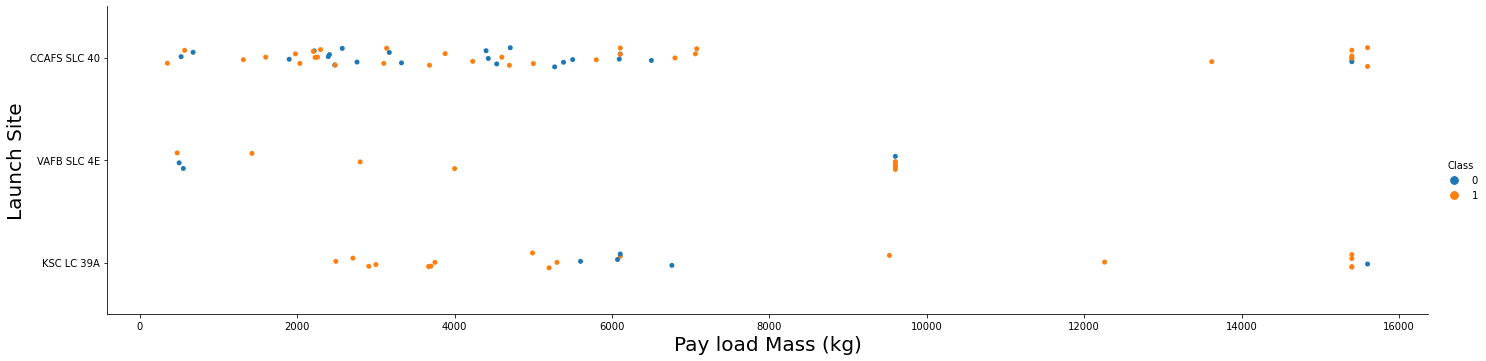

In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 4)
plt.xlabel("Pay load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


the relationship between success rate of each orbit type


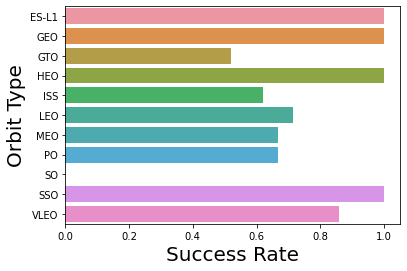

In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column
df1=df.groupby(['Orbit']).mean()
df1.reset_index(inplace=True)
sns.barplot(y="Orbit", x="Class", data=df1)
plt.xlabel("Success Rate",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

In [ ]:
df1

Orbit  FlightNumber   PayloadMass   Flights  GridFins    Reused      Legs  \
0   ES-L1     13.000000    570.000000  1.000000  1.000000  0.000000  1.000000   
1     GEO     83.000000   6104.959412  2.000000  1.000000  1.000000  1.000000   
2     GTO     35.037037   5011.994444  1.407407  0.629630  0.333333  0.629630   
3     HEO     49.000000    350.000000  1.000000  1.000000  0.000000  1.000000   
4     ISS     39.142857   3279.938095  1.238095  0.809524  0.238095  0.857143   
5     LEO     20.000000   3882.839748  1.000000  0.571429  0.000000  0.714286   
6     MEO     77.666667   3987.000000  1.000000  0.666667  0.000000  0.666667   
7      PO     36.333333   7583.666667  1.333333  0.888889  0.333333  0.777778   
8      SO     73.000000   6104.959412  4.000000  0.000000  1.000000  0.000000   
9     SSO     60.800000   2060.000000  2.400000  1.000000  0.800000  1.000000   
10   VLEO     78.928571  15315.714286  3.928571  1.000000  1.000000  1.000000   

       Block  ReusedCount   Longitude   Latitude     Class  
0   1.000000     0.000000  -80.577366  28.561857  1.000000  
1   5.000000     2.000000  -80.577366  28.561857  1.000000  
2   3.037037     0.962963  -80.586229  28.577258  0.518519  
3   4.000000     1.000000  -80.577366  28.561857  1.000000  
4   3.142857     1.285714  -80.583697  28.572857  0.619048  
5   2.142857     0.428571  -80.584963  28.575058  0.714286  
6   5.000000     0.666667  -80.577366  28.561857  0.666667  
7   3.222222     1.555556 -120.610829  34.632093  0.666667  
8   5.000000     3.000000  -80.603956  28.608058  0.000000  
9   4.600000     3.200000 -112.604136  33.418046  1.000000  
10  5.000000     3.928571  -80.586862  28.578358  0.857143

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


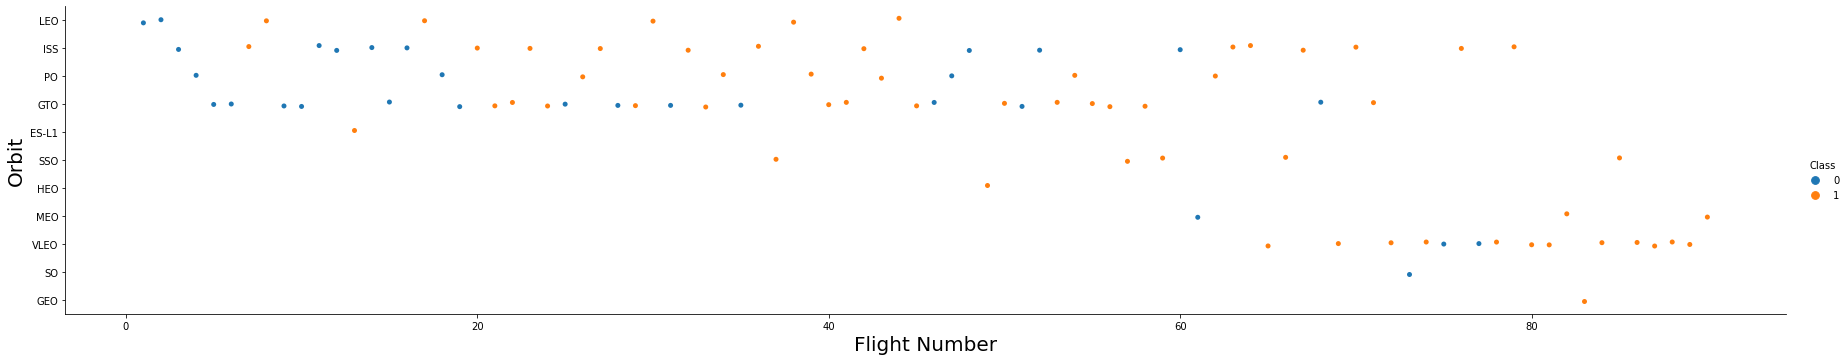

In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


Then plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


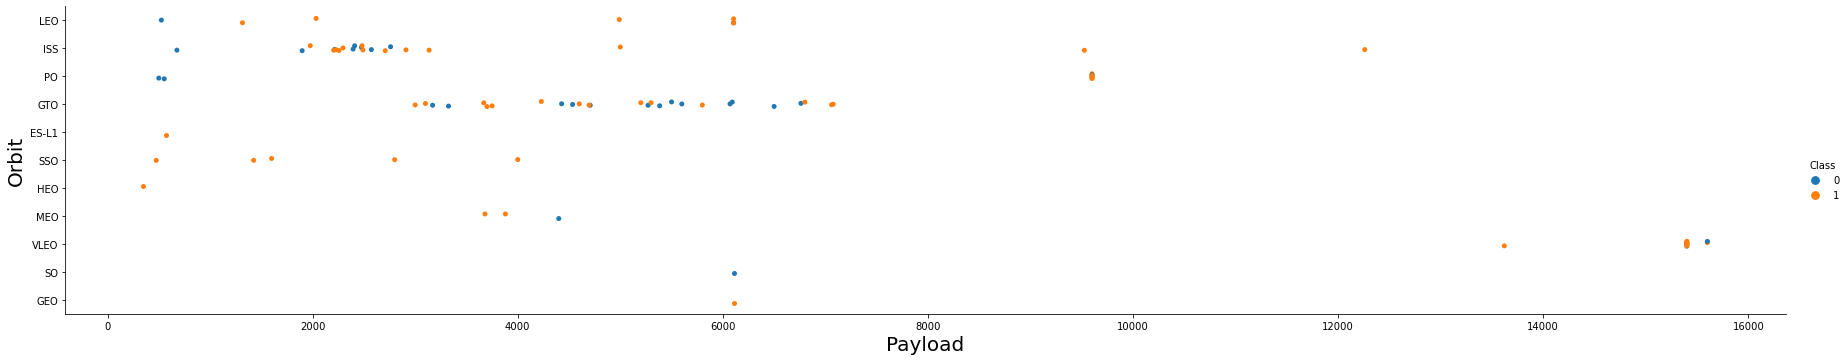

In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 5)
plt.xlabel("Payload",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend.


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [ ]:
Extract_year()
df['Year']=year

In [ ]:
df2=df.groupby(['Year']).mean()
df2.reset_index(inplace=True)
df2

Year  FlightNumber   PayloadMass   Flights  GridFins    Reused      Legs  \
0  2010           1.0   6104.959412  1.000000  0.000000  0.000000  0.000000   
1  2012           2.0    525.000000  1.000000  0.000000  0.000000  0.000000   
2  2013           4.0   1449.000000  1.000000  0.000000  0.000000  0.000000   
3  2014           8.5   3019.333333  1.000000  0.000000  0.000000  0.333333   
4  2015          14.5   2346.833333  1.000000  0.833333  0.000000  0.833333   
5  2016          21.5   3639.125000  1.000000  1.000000  0.000000  1.000000   
6  2017          34.5   5365.719967  1.277778  0.833333  0.277778  0.777778   
7  2018          52.5   4832.767190  1.555556  0.833333  0.500000  0.833333   
8  2019          66.5   7551.370000  2.200000  0.900000  0.700000  0.900000   
9  2020          81.0  11477.522043  3.315789  0.947368  0.842105  0.947368   

      Block  ReusedCount  Longitude   Latitude     Class  
0  1.000000     0.000000 -80.577366  28.561857  0.000000  
1  1.000000     0.000000 -80.577366  28.561857  0.000000  
2  1.000000     0.000000 -93.921854  30.585269  0.000000  
3  1.000000     0.000000 -80.577366  28.561857  0.333333  
4  1.000000     0.000000 -80.577366  28.561857  0.333333  
5  1.875000     0.375000 -85.581549  29.320637  0.625000  
6  3.166667     0.777778 -91.715499  30.278835  0.833333  
7  4.500000     1.833333 -89.476646  29.915932  0.611111  
8  5.000000     3.800000 -88.586718  29.780524  0.900000  
9  5.000000     3.210526 -80.587162  28.578879  0.842105

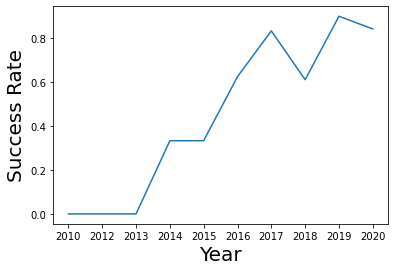

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate
sns.lineplot(y="Class", x="Year", data=df2)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

the sucess rate since 2013 kept increasing till 2020


select the features that will be used in success prediction in the future module.

In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.shape

(90, 12)

In [ ]:
features.Serial.unique()

array(['B0003', 'B0005', 'B0007', 'B1003', 'B1004', 'B1005', 'B1006',
       'B1007', 'B1008', 'B1011', 'B1010', 'B1012', 'B1013', 'B1015',
       'B1016', 'B1018', 'B1019', 'B1017', 'B1020', 'B1021', 'B1022',
       'B1023', 'B1025', 'B1026', 'B1028', 'B1029', 'B1031', 'B1030',
       'B1032', 'B1034', 'B1035', 'B1036', 'B1037', 'B1039', 'B1038',
       'B1040', 'B1041', 'B1042', 'B1043', 'B1044', 'B1045', 'B1046',
       'B1047', 'B1048', 'B1049', 'B1050', 'B1054', 'B1051', 'B1056',
       'B1059', 'B1058', 'B1060', 'B1062'], dtype=object)

Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. 

In [ ]:
# HINT: Use get_dummies() function on the categorical columns
orbit_dummies = pd.get_dummies(features['Orbit'])
features = pd.merge(
    left=features,
    right=orbit_dummies,
    left_index=True,
    right_index=True,
)


FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ...  GEO GTO  HEO  ISS  LEO  MEO  PO  SO  SSO  \
0  False        NaN    1.0  ...    0   0    0    0    1    0   0   0    0   
1  False        NaN    1.0  ...    0   0    0    0    1    0   0   0    0   
2  False        NaN    1.0  ...    0   0    0    1    0    0   0   0    0   
3  False        NaN    1.0  ...    0   0    0    0    0    0   1   0    0   
4  False        NaN    1.0  ...    0   1    0    0    0    0   0   0    0   

   VLEO  
0     0  
1     0  
2     0  
3     0  
4     0  

[5 rows x 23 columns]

In [ ]:
site_dummies = pd.get_dummies(features['LaunchSite'])
features = pd.merge(
    left=features,
    right=site_dummies,
    left_index=True,
    right_index=True,
)


In [ ]:
landing_dummies = pd.get_dummies(features['LandingPad'])
features = pd.merge(
    left=features,
    right=landing_dummies,
    left_index=True,
    right_index=True,
)

In [ ]:
serial_dummies = pd.get_dummies(features['Serial'])
features = pd.merge(
    left=features,
    right=serial_dummies,
    left_index=True,
    right_index=True,
)

In [ ]:
features

FlightNumber   PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0              1   6104.959412   LEO  CCAFS SLC 40        1     False   False   
1              2    525.000000   LEO  CCAFS SLC 40        1     False   False   
2              3    677.000000   ISS  CCAFS SLC 40        1     False   False   
3              4    500.000000    PO   VAFB SLC 4E        1     False   False   
4              5   3170.000000   GTO  CCAFS SLC 40        1     False   False   
..           ...           ...   ...           ...      ...       ...     ...   
85            86  15400.000000  VLEO    KSC LC 39A        2      True    True   
86            87  15400.000000  VLEO    KSC LC 39A        3      True    True   
87            88  15400.000000  VLEO    KSC LC 39A        6      True    True   
88            89  15400.000000  VLEO  CCAFS SLC 40        3      True    True   
89            90   3681.000000   MEO  CCAFS SLC 40        1      True   False   

     Legs                LandingPad  Block  ...  B1048 B1049  B1050  B1051  \
0   False                       NaN    1.0  ...      0     0      0      0   
1   False                       NaN    1.0  ...      0     0      0      0   
2   False                       NaN    1.0  ...      0     0      0      0   
3   False                       NaN    1.0  ...      0     0      0      0   
4   False                       NaN    1.0  ...      0     0      0      0   
..    ...                       ...    ...  ...    ...   ...    ...    ...   
85   True  5e9e3032383ecb6bb234e7ca    5.0  ...      0     0      0      0   
86   True  5e9e3032383ecb6bb234e7ca    5.0  ...      0     0      0      0   
87   True  5e9e3032383ecb6bb234e7ca    5.0  ...      0     0      0      1   
88   True  5e9e3033383ecbb9e534e7cc    5.0  ...      0     0      0      0   
89   True  5e9e3032383ecb6bb234e7ca    5.0  ...      0     0      0      0   

    B1054  B1056  B1058  B1059  B1060  B1062  
0       0      0      0      0      0      0  
1       0      0      0      0      0      0  
2       0      0      0      0      0      0  
3       0      0      0      0      0      0  
4       0      0      0      0      0      0  
..    ...    ...    ...    ...    ...    ...  
85      0      0      0      0      1      0  
86      0      0      1      0      0      0  
87      0      0      0      0      0      0  
88      0      0      0      0      1      0  
89      0      0      0      0      0      1  

[90 rows x 84 columns]